# Step 1: Data Preparation
The steps include


*  Importing libraries
*  loading dataset
*  checking datasets and creating brief summary of dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset (assuming CSV format)
df = pd.read_csv('/content/updated data.csv', encoding= "latin-1")

In [ ]:
# Checking the first few rows of the dataset
print(df.head())

   Unnamed: 0      City    Year     Sport Discipline           Event  \
0           0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1           1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2           2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3           3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4           4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0          KÃHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [ ]:
# Summary(1) of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    15433 non-null  int64  
 1   City          15316 non-null  object 
 2   Year          15316 non-null  float64
 3   Sport         15316 non-null  object 
 4   Discipline    15316 non-null  object 
 5   Event         15316 non-null  object 
 6   Athlete       15316 non-null  object 
 7   Gender        15316 non-null  object 
 8   Country_Code  15316 non-null  object 
 9   Country       15316 non-null  object 
 10  Event_gender  15316 non-null  object 
 11  Medal         15316 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.4+ MB
None


In [ ]:
# Summary(2) of the dataset
print(df.describe())

         Unnamed: 0          Year
count  15433.000000  15316.000000
mean    7716.000000   1993.620789
std     4455.267687     10.159851
min        0.000000   1976.000000
25%     3858.000000   1984.000000
50%     7716.000000   1996.000000
75%    11574.000000   2004.000000
max    15432.000000   2008.000000


# **Step 2: Data Cleaning**
Checking for missing values and remove or impute them if necessary.

In [ ]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0        0
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [ ]:
# Drop rows with missing values if any
df_cleaned = df.dropna()

In [ ]:
print(df.isnull().sum())

Unnamed: 0        0
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [ ]:
df.to_csv(r'C:\Users\Admin\Desktop\data olympics.csv')

In [ ]:
# After cleaning, check the dataset again
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


# **Step 3: Exploratory Data Analysis (EDA)**

In [ ]:
# 3.1 Total Medal Count by Country
medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)

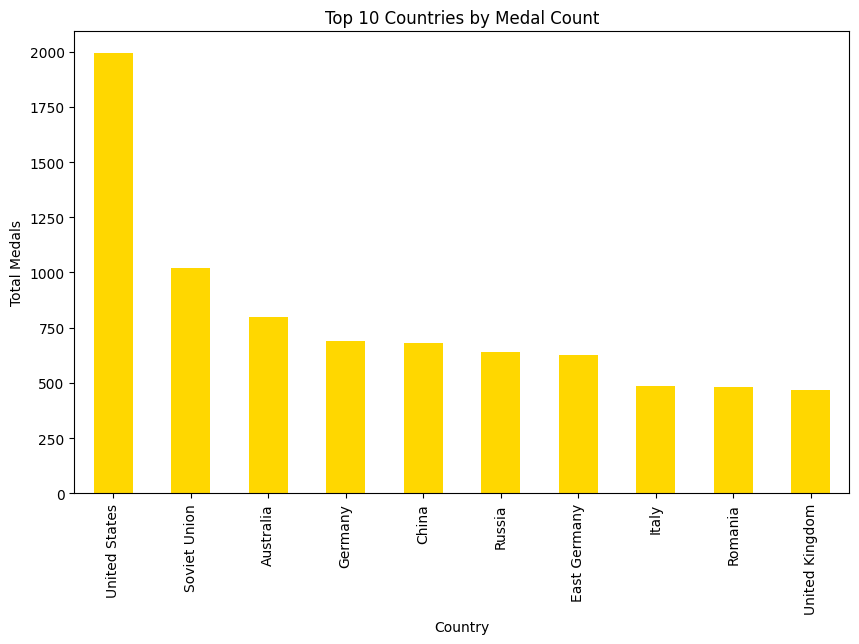

In [ ]:
# Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

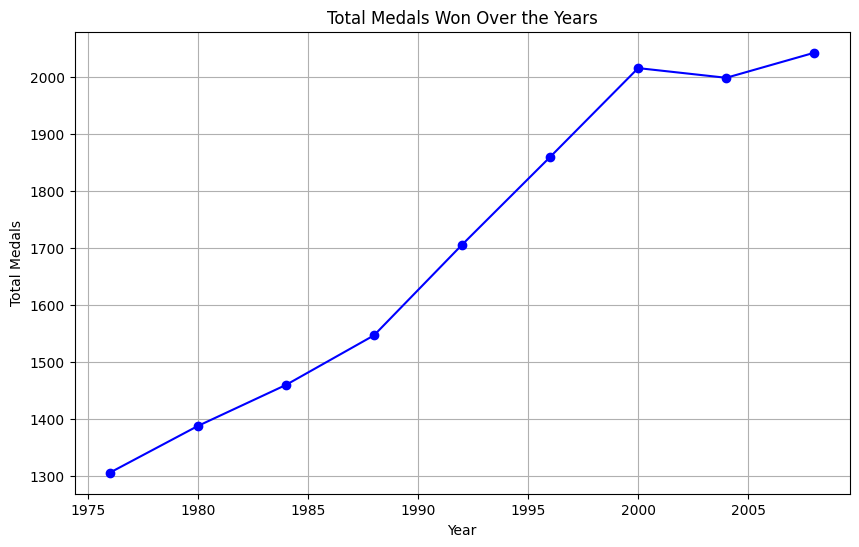

In [ ]:
# 3.2 Medals Won Over the Years

# Grouping by Year and counting the medals won

medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

# Plotting the trend of medals won over the years

plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,

marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

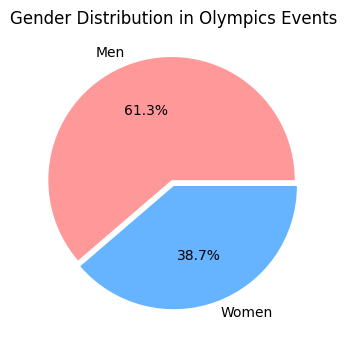

In [ ]:
# 3.3 Gender Distribution in Events

gender_distribution = df_cleaned['Gender'].value_counts()

# Plotting gender distribution

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [ ]:
# 3.4 Top Athletes with Most Medals

# Group by Athlete and count the number of medals

athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

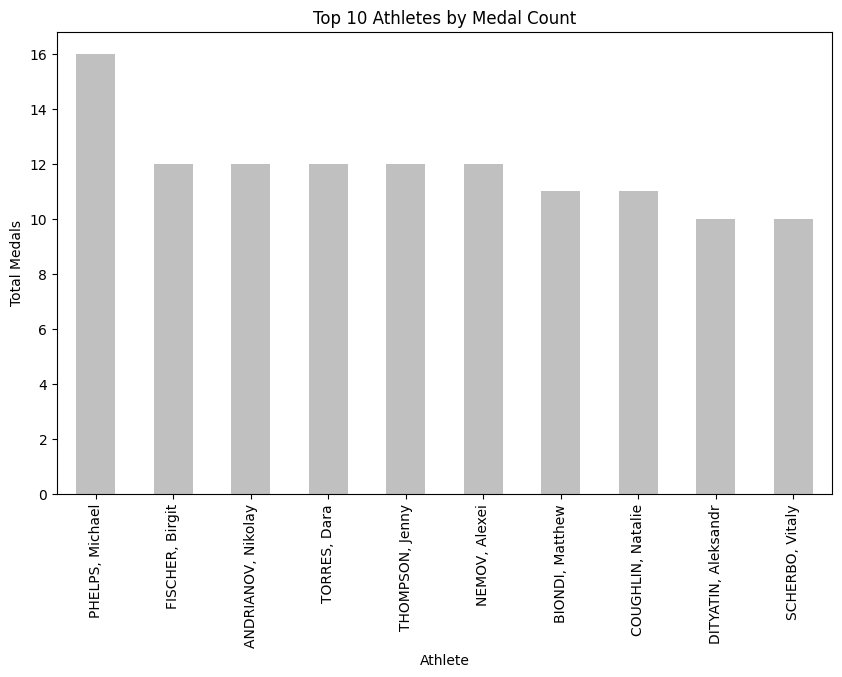

In [ ]:
  # Plotting the top 10 athletes with most medals

plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()